# Banking market

 Input variables:
   #### bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   #### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   #### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   #### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas import DataFrame
%matplotlib inline

In [3]:
bm = pd.read_csv('D:/STA/machine_learning/bank-additional/bank-additional/bank-additional-full.csv')

In [4]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bm.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bm.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
# checking for null values 
bm.isnull().values.any()

False

<AxesSubplot:>

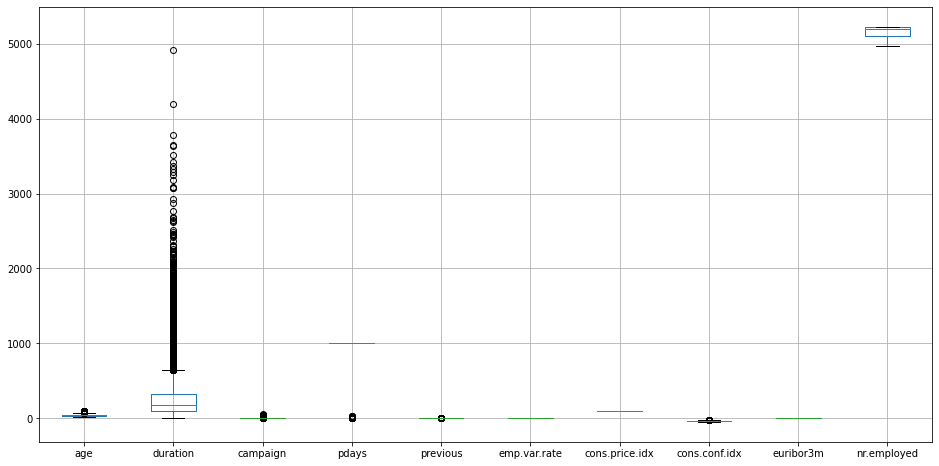

In [8]:
# outlier analysis
plt.figure(figsize=(16,8))
bm.boxplot()

it can be seen from the boxplot that the 'duration' has many abnormal value, we need to drop the variables.

In [9]:
bm.drop('duration', axis=1, inplace = True)

# EDA

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>,
        <AxesSubplot:title={'center':'cons.price.idx'}>],
       [<AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr.employed'}>]], dtype=object)

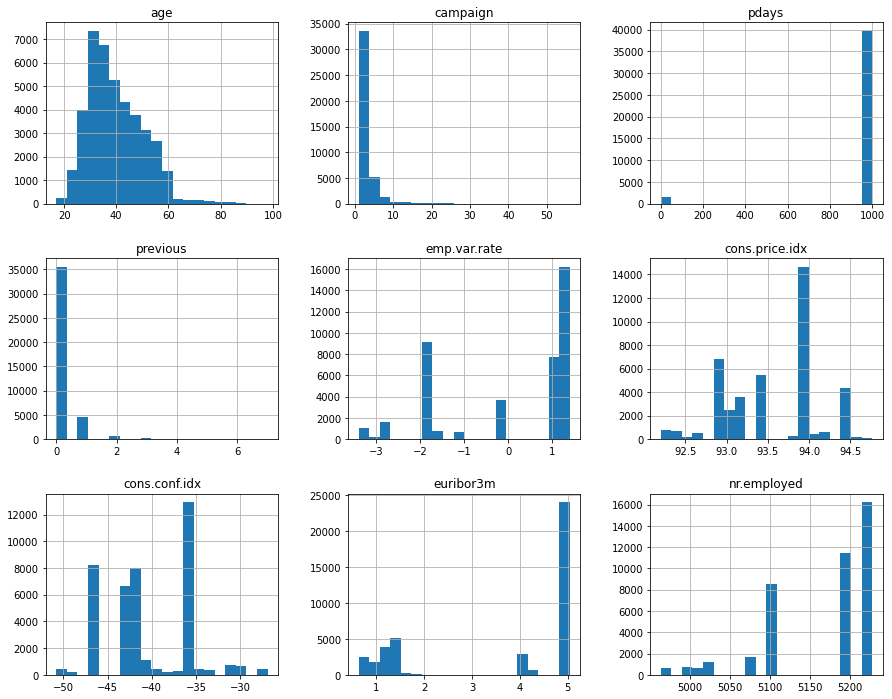

In [10]:
bm.hist(bins=20, figsize=(15,12))

In [11]:
# checking for >=75% correlation variables 
bm_corr = bm.corr()
bm_corr_75 = bm_corr[bm_corr>=0.75]
bm_corr_75

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


<AxesSubplot:>

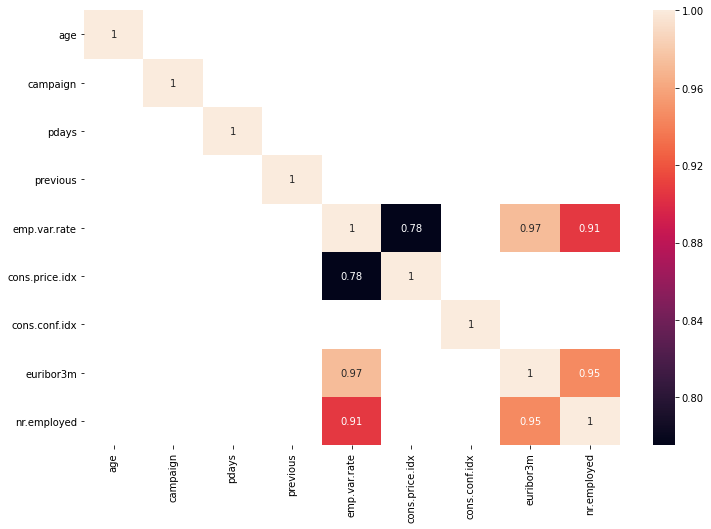

In [12]:
# correlation heatmap
# reference: http://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(12,8))
sns.heatmap(bm_corr_75,annot = True)

<AxesSubplot:xlabel='y', ylabel='count'>

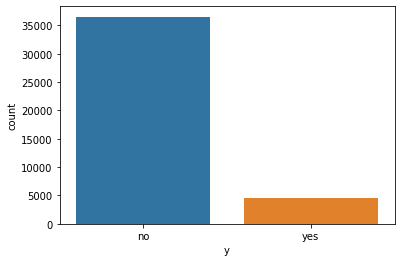

In [13]:
# Target distribution
sns.countplot(bm['y'])

In [14]:
# drop the irrelevant variable
bm.drop(['contact','month','day_of_week'], axis=1, inplace = True)

In [15]:
tit = list(bm.select_dtypes(['object']).astype('category'))
tit

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

In [16]:
# show the label of the cat.code
# reference: https://www.cnpython.com/qa/79036

for i in range(len(tit)):
    c = bm[tit[i]].astype('category')
    d = dict(enumerate(c.cat.categories)) 
    print((tit[i],d))

('job', {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'})
('marital', {0: 'divorced', 1: 'married', 2: 'single', 3: 'unknown'})
('education', {0: 'basic.4y', 1: 'basic.6y', 2: 'basic.9y', 3: 'high.school', 4: 'illiterate', 5: 'professional.course', 6: 'university.degree', 7: 'unknown'})
('default', {0: 'no', 1: 'unknown', 2: 'yes'})
('housing', {0: 'no', 1: 'unknown', 2: 'yes'})
('loan', {0: 'no', 1: 'unknown', 2: 'yes'})
('poutcome', {0: 'failure', 1: 'nonexistent', 2: 'success'})
('y', {0: 'no', 1: 'yes'})


In [17]:
# Encoding of non-numeric attributes
# reference:https://stackoverflow.com/questions/48862002/using-cat-codes-within-a-for-loop

cat_to_code = bm.select_dtypes(['object']).astype('category').apply(lambda x:x.cat.codes)

bm[list(cat_to_code)] = cat_to_code
bm

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [18]:
xs = bm.drop('y', axis=1)
ys = [['y']]

In [19]:
xs.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Select 80% of the dataset for training and 20% for testing.

In [20]:
# reference: https://github.com/aldolipani/CEGE0004/blob/master/3%20-%20Week/instance-based_learning.ipynb
# week3 notebook
n_train = len(xs) * 80 // 100
xs_train, xs_test = np.split(xs, [n_train], axis=0)
ys_train, ys_test = np.split(ys, [n_train], axis=0)
print('training set shape:\t', xs_train.shape)
print('test set shape:\t\t', xs_test.shape)

training set shape:	 (32950, 16)
test set shape:		 (8238, 16)
